# Neural Networks 2

Today we'll talk about backpropagation and more complex neural networks.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/intro-stat-learning/ISLP/main/ISLP/data/Credit.csv")

In [4]:
df = df[["Income", "Limit", "Balance"]]
df = df.rename(columns=str.lower)
df = (df - df.mean()) / df.std()
df.shape

(400, 3)

## Where we ended last time

We finished our last lecture with this neural network:

<img src="https://github.com/harismck/ism-data-science-2025/blob/master/week10/one_feature_one_neuron.png?raw=true" width="1000">


The loss of this network is:

$$
\mathcal{L}\bigl(w^{(1)},b^{(1)},w^{(2)},b^{(2)}\bigr)
  = \sum_{i=1}^{m}
    \left(
      w^{(2)}\,\sigma\!\bigl(w^{(1)}x_i + b^{(1)}\bigr)
      + b^{(2)}
      - y_i
    \right)^{2}
$$



In [5]:
X = df["limit"].values
y = df["balance"].values
X.shape

(400,)

In [6]:
# activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# loss
def sum_of_squares(a, y):
    return np.sum((a - y) ** 2)


In [7]:
w1 = np.float32(1)
b1 = np.float32(1)
w2 = np.float32(1)
b2 = np.float32(1)


In [8]:
z1 = X * w1 + b1
a1 = sigmoid(z1)
z2 = a1 * w2 + b2
L = sum_of_squares(z2, y)
L

np.float64(1444.3526409019069)

Now we want to perform gradient descent, for which we have to find these four gradients:

$$
\frac{\partial\mathcal{L}}{\partial w^{(2)}};
\frac{\partial\mathcal{L}}{\partial b^{(2)}};
\frac{\partial\mathcal{L}}{\partial w^{(1)}};
\frac{\partial\mathcal{L}}{\partial b^{(1)}}
$$


The problem is that network now contains functions of functions - $z^{(2)}$ is a function of $a^{(1)}$, $w^{(2)}$ and $b^{(2)}$, and $a^{(1)}$ is itself a function of $w^{(1)}$ and $b^{(1)}$. When we have to find partial derivatives of a composite function $f(g(x))$, we turn to the chain rule.

Given the derivative of the sigmoid activation function:

$$

(a^{(1)}_i)' = a^{(1)}_i * (1 - a^{(1)}_i)
\\

$$

The formulas for the gradients are:

$$

\frac{\partial\mathcal{L}}{\partial w^{(2)}} = 2\sum_{i=1}^{m}\!\Bigl( w^{(2)}a^{(1)}  + b^{(2)} - y_i \Bigr)\,a^{(1)}
\\
\frac{\partial\mathcal{L}}{\partial b^{(2)}} = 2\sum_{i=1}^{m}\!\Bigl( w^{(2)}a^{(1)}  + b^{(2)} - y_i \Bigr)
\\
\frac{\partial\mathcal{L}}{\partial w^{(1)}} = 2\sum_{i=1}^{m}\!\Bigl( w^{(2)}a^{(1)}  + b^{(2)} - y_i \Bigr)\,w^{(2)}\,(a^{(1)})'x_i
\\
\frac{\partial\mathcal{L}}{\partial b^{(1)}} = 2\sum_{i=1}^{m}\!\Bigl( w^{(2)}a^{(1)}  + b^{(2)} - y_i \Bigr)\,w^{(2)}\,(a^{(1)})'

$$


We can actually ignore the 2 in the front in the formulas above, since it just scales the gradients, and we will scale them anyways using the learning rate.


In [9]:
def d_sigmoid(x):
    return x * (1 - x)


### Task

Finish the code for the backward pass below.


In [10]:
# Initialize weights
w1 = np.float32(2)
b1 = np.float32(2)
w2 = np.float32(2)
b2 = np.float32(2)

lr = 0.001

# forward pass
z1 = X * w1 + b1
a1 = sigmoid(z1)
z2 = a1 * w2 + b2

# loss
L = sum_of_squares(z2, y)

# backward pass (backpropagation)
err = z2 - y
grad_w2 = ...
grad_b2 = ...
grad_w1 = ...
grad_b1 = ...


In [11]:
## Answer

# Initialize weights
w1 = np.float32(2)
b1 = np.float32(2)
w2 = np.float32(2)
b2 = np.float32(2)

lr = 0.001

# forward pass
z1 = X * w1 + b1
a1 = sigmoid(z1)
z2 = a1 * w2 + b2

# loss
L = sum_of_squares(z2, y)

# backward pass (backpropagation)
err = z2 - y
grad_w2 = np.sum(err * a1) # element-wise (not a dot product)
grad_b2 = np.sum(err)
grad_w1 = np.sum(err * w2 * d_sigmoid(a1) * X)
grad_b1 = np.sum(err * w2 * d_sigmoid(a1))


### Task

Complete the code below using the code you wrote for the backward pass + implementing the gradient descent.

Print out the weights and visualize the function that your model is fitting to the data.

In [12]:
# Initialize weights
w1 = np.float32(2)
b1 = np.float32(2)
w2 = np.float32(2)
b2 = np.float32(2)

lr = 0.001

for i in range(100000):
    # forward pass
    z1 = X * w1 + b1
    a1 = sigmoid(z1)
    z2 = a1 * w2 + b2

    # loss
    L = sum_of_squares(z2, y)

    # backprop

    # gradient descent
    


In [13]:
## Answer

# Initialize weights
w1 = np.float32(2)
b1 = np.float32(2)
w2 = np.float32(2)
b2 = np.float32(2)

lr = 0.001

for i in range(5000):
    # forward pass
    z1 = X * w1 + b1
    a1 = sigmoid(z1)
    z2 = a1 * w2 + b2

    # loss
    L = sum_of_squares(z2, y)

    # backprop
    err = z2 - y
    grad_w2 = np.sum(err * a1) # element-wise (not a dot product)
    grad_b2 = np.sum(err)
    grad_w1 = np.sum(err * w2 * d_sigmoid(a1) * X)
    grad_b1 = np.sum(err * w2 * d_sigmoid(a1))

    # gradient descent
    w2 -= lr * grad_w2
    b2 -= lr * grad_b2
    w1 -= lr * grad_w1
    b1 -= lr * grad_b1


In [14]:
w2, b2, w1, b1

(np.float64(4.0015370082595805),
 np.float64(-1.9168866824790929),
 np.float64(1.092341504871684),
 np.float64(-0.05521574072257778))

<Axes: >

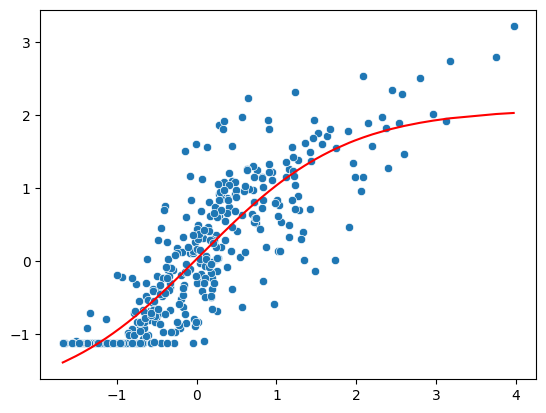

In [15]:
# forward pass
z1 = X * w1 + b1
a1 = sigmoid(z1)
z2 = a1 * w2 + b2

sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=z2, color="red")


## More neurons

Let's stick with one feature, but add more neurons to that hidden layer. The complication now is that we have more weights, and even though an individual weight is still scalar, writing backprop for every individual weight will quickly become unmanageable and inefficient. Therefore, from now on we will perform matrix operations.

<img src="https://github.com/harismck/ism-data-science-2025/blob/master/week10/one_feature_two_neurons.png?raw=true" width="1000">



In [16]:
X = df[["limit"]].values
y = df[["balance"]].values

### Task

Implement the forward pass of the illustrated network.


In [17]:
# Relevant numpy operations
X1 = np.ones((3, 3))
X2 = np.ones((3, 1))
X1 @ X2


array([[3.],
       [3.],
       [3.]])

In [18]:
# initialize weights
W1 = np.ones((1, 2))
b1 = np.ones((2))
W2 = np.ones((2, 1))
b2 = np.ones((1))

# forward pass
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2



In [19]:
W1

array([[1., 1.]])

### Task

Implement a single step of gradient descent for the neural network. Since we are no longer working with scalars, our gradient calculations became a little more complex as well. The exact formulas are given below.

Run the cell that performs gradient descent several times, while printing out the weights. What do you notice?

In [23]:
# initialize weights
W1 = np.ones((1, 2))
b1 = np.ones((2))
W2 = np.ones((2, 1))
b2 = np.ones((1))


In [24]:
# forward pass
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2

lr = 0.0001

# Calculate gradients
delta2 = 2 * (z2 - y)
grad_W2 = a1.T @ delta2
grad_b2 = np.sum(delta2, axis=0)
delta1 = (delta2 @ W2.T) * d_sigmoid(a1)
grad_W1 = X.T @ delta1
grad_b1 = np.sum(delta1, axis=0)

# Update weights
W2 -= lr * grad_W2
b2 -= lr * grad_b2
W1 -= lr * grad_W1
b1 -= lr * grad_b1


### Task

Implement a function `gradient_descent` that performs gradient descent of the neural network. Use it to perform gradient descent, then print out the weights. What do you notice?


In [25]:
def gradient_descent(X, y, W1, b1, W2, b2, lr=0.0001, n_iter=10000):
    for _ in range(n_iter):
        z1 = X @ W1 + b1
        a1 = sigmoid(z1)
        z2 = a1 @ W2 + b2

        delta2 = 2 * (z2 - y)
        grad_w2 = a1.T @ delta2
        grad_b2 = np.sum(delta2, axis=0)
        delta1 = (delta2 @ W2.T) * d_sigmoid(a1)
        grad_w1 = X.T @ delta1
        grad_b1 = np.sum(delta1, axis=0)

        W2 -= lr * grad_w2
        b2 -= lr * grad_b2
        W1 -= lr * grad_w1
        b1 -= lr * grad_b1
    
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X, y, W1, b1, W2, b2, lr=0.0001, n_iter=10000)

W1, b1, W2, b2

(array([[1.18383435, 1.18383435]]),
 array([-0.07810662, -0.07810662]),
 array([[1.89282447],
        [1.89282447]]),
 array([-1.79171458]))

### Task

Fix the problem above by choosing weights randomly.


In [26]:
# Answer
W1 = np.random.randn(1, 2)
b1 = np.random.randn(2)
W2 = np.random.randn(2, 1)
b2 = np.random.randn(1)

W1, b1, W2, b2 = gradient_descent(X, y, W1, b1, W2, b2, lr=0.0001, n_iter=10000)


In [27]:
W2, b2, W1, b1


(array([[-1.95190067],
        [ 2.11124583]]),
 array([0.71279961]),
 array([[-1.49651215,  2.66256495]]),
 array([3.72202943, 0.44772167]))

<Axes: >

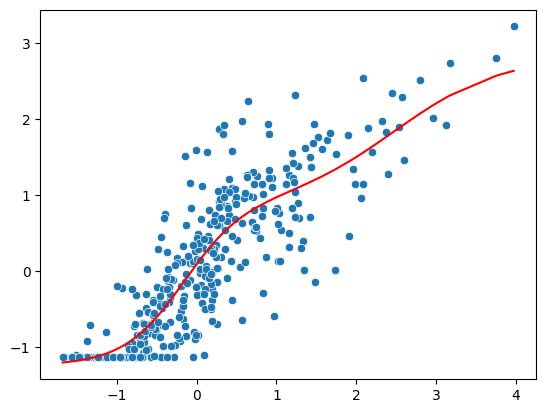

In [28]:
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2

sns.scatterplot(x=X[:,0], y=y[:,0])
sns.lineplot(x=X[:,0], y=z2[:,0], color="red")

### Task

Implement a network with 5 neurons in the hidden layer, and run gradient descent for 20k iterations.


<Axes: >

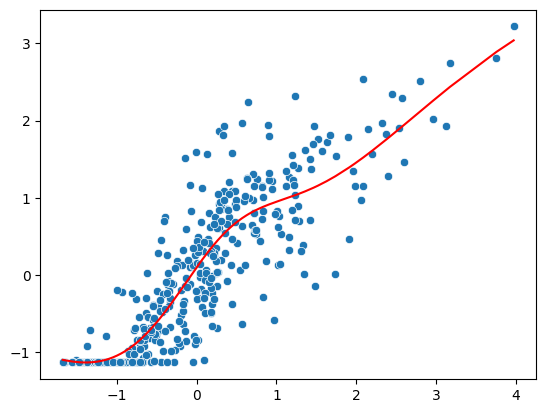

In [29]:
# Answer
W1 = np.random.randn(1, 5)
b1 = np.random.randn(5)
W2 = np.random.randn(5, 1)
b2 = np.random.randn(1)

W1, b1, W2, b2 = gradient_descent(X, y, W1, b1, W2, b2, n_iter=20000)

z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2

sns.scatterplot(x=X[:,0], y=y[:,0])
sns.lineplot(x=X[:,0], y=z2[:,0], color="red")

## Two input features, single neuron


<img src="https://github.com/harismck/ism-data-science-2025/blob/master/week10/two_features_one_neuron.png?raw=true" width="1000">



### Task

Implement the forward pass of the neural networks above. Then, perform gradient descent and print the weights. Use random initialization for the weights. 


In [30]:
# Answer

X = df[["limit", "income"]].values
y = df[["balance"]].values

W1 = np.random.randn(2, 1)
b1 = np.random.randn(1)
W2 = np.random.randn(1, 1)
b2 = np.random.randn(1)

# Forward pass
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2

W1, b1, W2, b2 = gradient_descent(X, y, W1, b1, W2, b2, lr=0.0001, n_iter=10000)

W1, b1, W2, b2


(array([[4.11642996]]),
 array([-1.42321924]),
 array([[ 1.80666166],
        [-0.82487168]]),
 array([-0.83848204]))

Now let's look at what kind of function we're fitting. We do not need to make any changes to backprop.

In [31]:
import plotly.graph_objects as go

x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

X_mesh = np.column_stack((x_mesh.ravel(), y_mesh.ravel()))
z1_mesh = X_mesh @ W1 + b1
a1_mesh = sigmoid(z1_mesh)
z2_mesh = a1_mesh @ W2 + b2
z_mesh = z2_mesh.reshape(x_mesh.shape)

fig = go.Figure(data=[
    go.Surface(x=x_mesh, y=y_mesh, z=z_mesh),
    go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y.ravel(), 
                 mode='markers', marker=dict(size=5))
])

fig.update_layout(
    scene = dict(
        xaxis_title='limit',
        yaxis_title='income',
        zaxis_title='balance'
    ),
    width=800,
    height=800
)

fig.show()


## Two features, two neurons

Now let's look at the most complex neural network we will fit today.

<img src="https://github.com/harismck/ism-data-science-2025/blob/master/week10/two_features_two_neurons.png?raw=true" width="1000">





### Task

Write the forward pass for the illustrated network.

In [32]:
# Answer

X = df[["limit", "income"]].values
y = df[["balance"]].values

W1 = np.random.randn(2, 2)
b1 = np.random.randn(2)
W2 = np.random.randn(2, 1)
b2 = np.random.randn(1)

# Forward pass
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2

W1, b1, W2, b2 = gradient_descent(X, y, W1, b1, W2, b2, lr=0.0001, n_iter=10000)


What does this network look like?

In [33]:
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

X_mesh = np.column_stack((x_mesh.ravel(), y_mesh.ravel()))
z1_mesh = X_mesh @ W1 + b1
a1_mesh = sigmoid(z1_mesh)
z2_mesh = a1_mesh @ W2 + b2
z_mesh = z2_mesh.reshape(x_mesh.shape)

fig = go.Figure(data=[
    go.Surface(x=x_mesh, y=y_mesh, z=z_mesh),
    go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y.ravel(), 
                 mode='markers', marker=dict(size=5))
])

fig.update_layout(
    scene = dict(
        xaxis_title='limit',
        yaxis_title='income',
        zaxis_title='balance'
    ),
    width=800,
    height=800
)

fig.show()


### Task

So far we worked with neural networks that are suited for regression tasks. Write a forward pass of a neural network that is suited for classification.

Also consider and answer the following - do we need to change the procedure for gradient descent? If so, in what ways?

In [34]:
# Answer
z1 = X @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2
a2 = sigmoid(z2)

## Recap

Congrats, you just implemented and trained a bunch of neural networks!

Here are the key components and concepts to remember:
- A feedforward neural network is essentially a series of matrix transformations and nonlinear transformations stacked together.
- Even though we only looked at networks with one hidden layer, we can have as many hidden layers as we like (or as many as your machine allows). Same goes for neurons within each layer.
- Nonlinear activation functions are what allow the neural network to fit complex functions to the data. Sigmoid is one such function, but there are many more.
- The trickiest part (at least conceptually) about deep neural networks is training them, since we have to figure out partial derivatives of the loss function with respect to every parameter, which requires the application of the chain rule.
- We can use these derivatives to calculate the  of the loss function with respect to each weight, via the process called backpropagation.
- The process of adjusting weights according to these gradients is called gradient descent - we move weights in the direction that reduces the loss the fastest.
- Learning rate controls the speed of gradient descent.

You do not need to remember the formulas of the derivatives or how to derive them.

